# MSA 2023 Phase 2 - Part 3

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import azureml.core
from azureml.core.model import Model
from azureml.core import Workspace, Dataset
from azureml.train.automl import AutoMLConfig
from azureml.core.experiment import Experiment
from azureml.core import ScriptRunConfig, Environment
from azureml.core.conda_dependencies import CondaDependencies
%matplotlib inline

# 1. Create Azure Endpoint

In [2]:
# Import dataset
data = pd.read_csv('salaries_processed.csv')

In [3]:
# read config.json and load workplace
ws = Workspace.from_config()

In [5]:
# Register model to azure
model = Model.register(model_path="salary_model.pkl",
                       model_name="Salary_Model",
                       tags={"type": "regression", "framework": "sklearn", "algorithm": "linear_regression"},
                       description="Linear Regression model for determining data-job salaries",
                       workspace=ws)

Registering model Salary_Model


# 2. Test Endpoint

In [14]:
import requests
import json

# Testing Endpoint
data = {
    "data": [[0.9106636059272467,2,1.1055516244102894,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0],
[0.9106636059272467,1,1.1055516244102894,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
[0.9106636059272467,1,1.1055516244102894,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
[0.9106636059272467,2,1.1055516244102894,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]}


# making call to ml endpoint
# uri = 
# key = 
headers = {"Content-Type": "application/json", "Authorization": f"Bearer {key}"}
data = json.dumps(data)
response = requests.post(uri, data = data, headers = headers)
print(response.json())

[80279.42217916696, 113215.09816535041, 113215.09816535041, 146268.87194816227]


# 3. Automated ML

In [30]:
# Upload data to workspace.
datastore = ws.get_default_datastore()
datastore.upload(
    # src_dir=r'',
    target_path='data',
    overwrite=True)

# create dataset
dataset = Dataset.Tabular.from_delimited_files(path=(datastore, 'data/data_salaries.csv'))

Uploading an estimated of 5 files
Uploading C:\Users\Ben\Documents\WorkComp\mystuff\Msa\23\P2\2023-msa-p2-data\examples\0. Resources\datasets\README.md
Uploaded C:\Users\Ben\Documents\WorkComp\mystuff\Msa\23\P2\2023-msa-p2-data\examples\0. Resources\datasets\README.md, 1 files out of an estimated total of 5
Uploading C:\Users\Ben\Documents\WorkComp\mystuff\Msa\23\P2\2023-msa-p2-data\examples\0. Resources\datasets\credit_risk.csv
Uploaded C:\Users\Ben\Documents\WorkComp\mystuff\Msa\23\P2\2023-msa-p2-data\examples\0. Resources\datasets\credit_risk.csv, 2 files out of an estimated total of 5
Uploading C:\Users\Ben\Documents\WorkComp\mystuff\Msa\23\P2\2023-msa-p2-data\examples\0. Resources\datasets\data_salaries.csv
Uploaded C:\Users\Ben\Documents\WorkComp\mystuff\Msa\23\P2\2023-msa-p2-data\examples\0. Resources\datasets\data_salaries.csv, 3 files out of an estimated total of 5
Uploading C:\Users\Ben\Documents\WorkComp\mystuff\Msa\23\P2\2023-msa-p2-data\examples\0. Resources\datasets\marke

In [31]:
# Configure experiment for linear regression, salary in usd
automl_config = AutoMLConfig(
    task='regression',
    compute_target='bdel3371',  
    primary_metric='normalized_root_mean_squared_error',  
    training_data=dataset,
    label_column_name='salary_in_usd',
    n_cross_validations=5,
    iterations=10, 
)

# run experiment
experiment_name = 'salary_usd_prediction'
experiment = Experiment(ws, experiment_name)
run = experiment.submit(automl_config, show_output=True)

Submitting remote run.
No run_configuration provided, running on bdel3371 with default configuration
Running on remote compute: bdel3371


Experiment,Id,Type,Status,Details Page,Docs Page
salary_usd_prediction,AutoML_0e6ac82a-c0b0-4f10-a0de-22e368acf4fc,automl,NotStarted,Link to Azure Machine Learning studio,Link to Documentation



Current status: FeaturesGeneration. Generating features for the dataset.
Current status: ModelSelection. Beginning model selection.

********************************************************************************************
DATA GUARDRAILS: 

TYPE:         Missing feature values imputation
STATUS:       PASSED
DESCRIPTION:  No feature missing values were detected in the training data.
              Learn more about missing value imputation: https://aka.ms/AutomatedMLFeaturization

********************************************************************************************

TYPE:         High cardinality feature detection
STATUS:       PASSED
DESCRIPTION:  Your inputs were analyzed, and no high cardinality features were detected.
              Learn more about high cardinality feature handling: https://aka.ms/AutomatedMLFeaturization

********************************************************************************************

*********************************************************

# Results

For Task 3 we used AutoML on the salaries dataset.

Below are 3 images showing for the run above Models used, Metrics for the best model in the run (VotingEnsemble) and the preprocessing steps done by the run.

We can see by the metrics provided that the RMS and MAE have improved compared to our original values of approx 40k and 30k respectively, the MAE and RMS have dropped to around 2k and 1k respectively for this new Model. It is likely that this Voting ensemble model is better equipped to handle Categorical features as those were greatly simplified in the preprocessing for my linear regression model. 

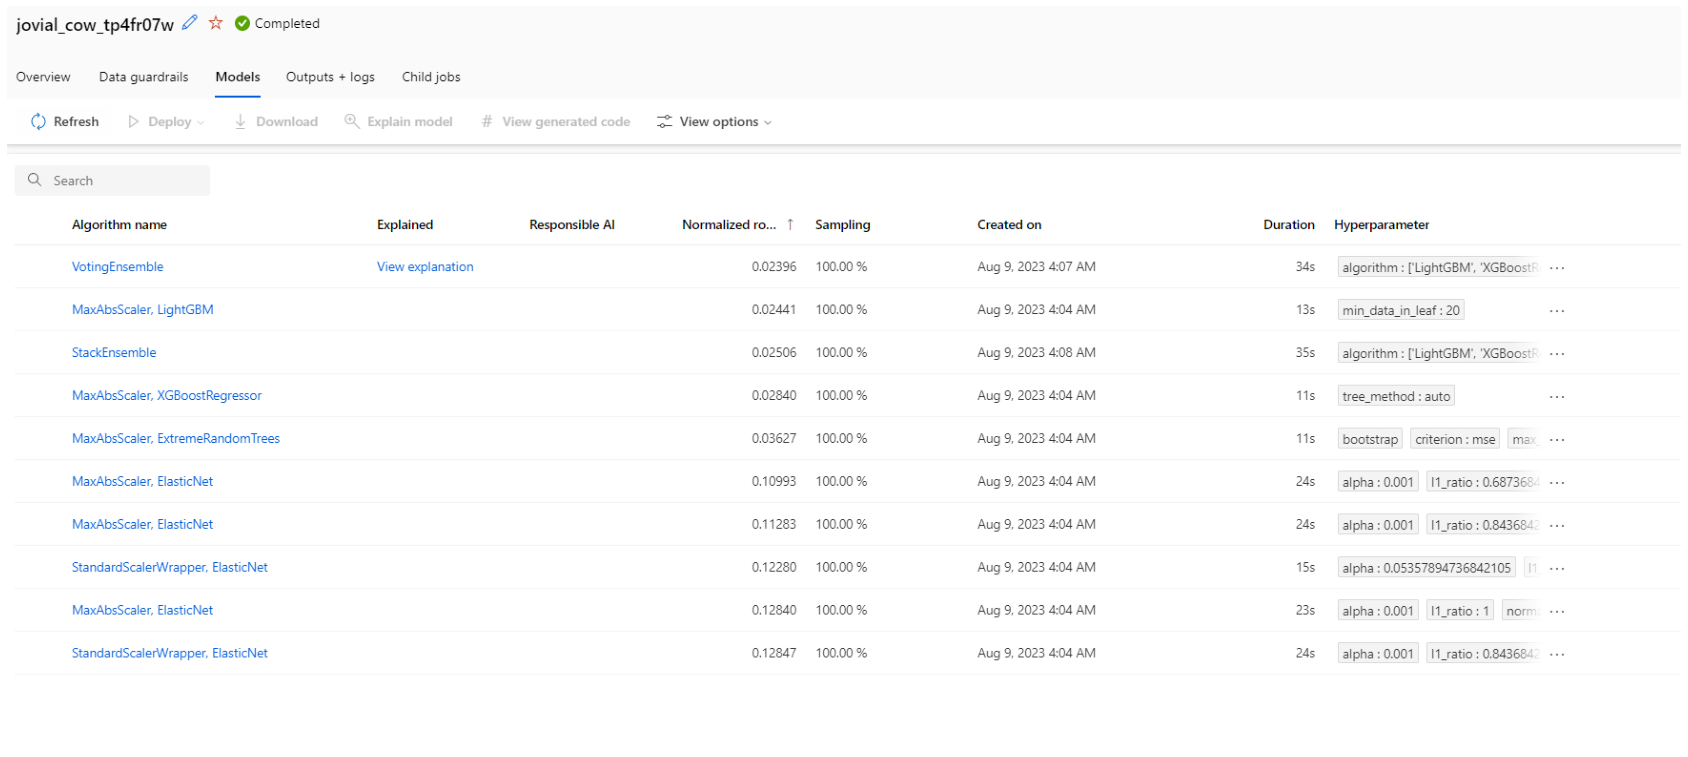

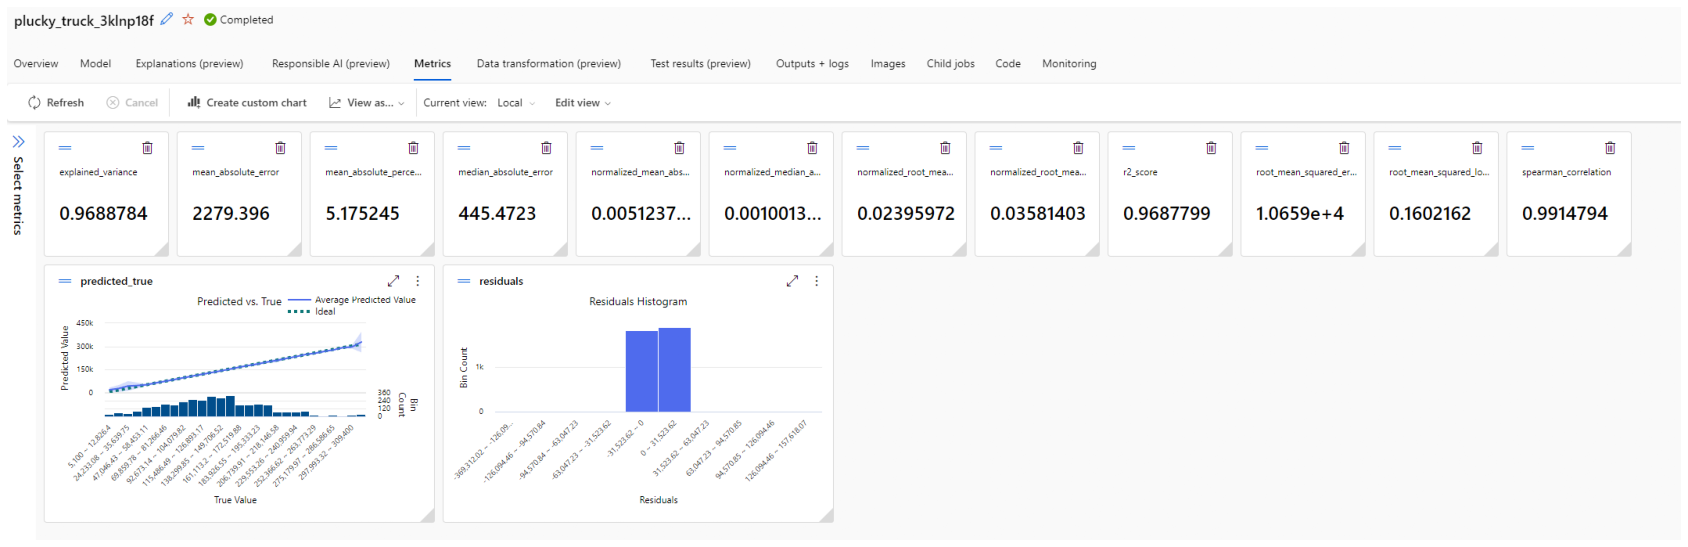

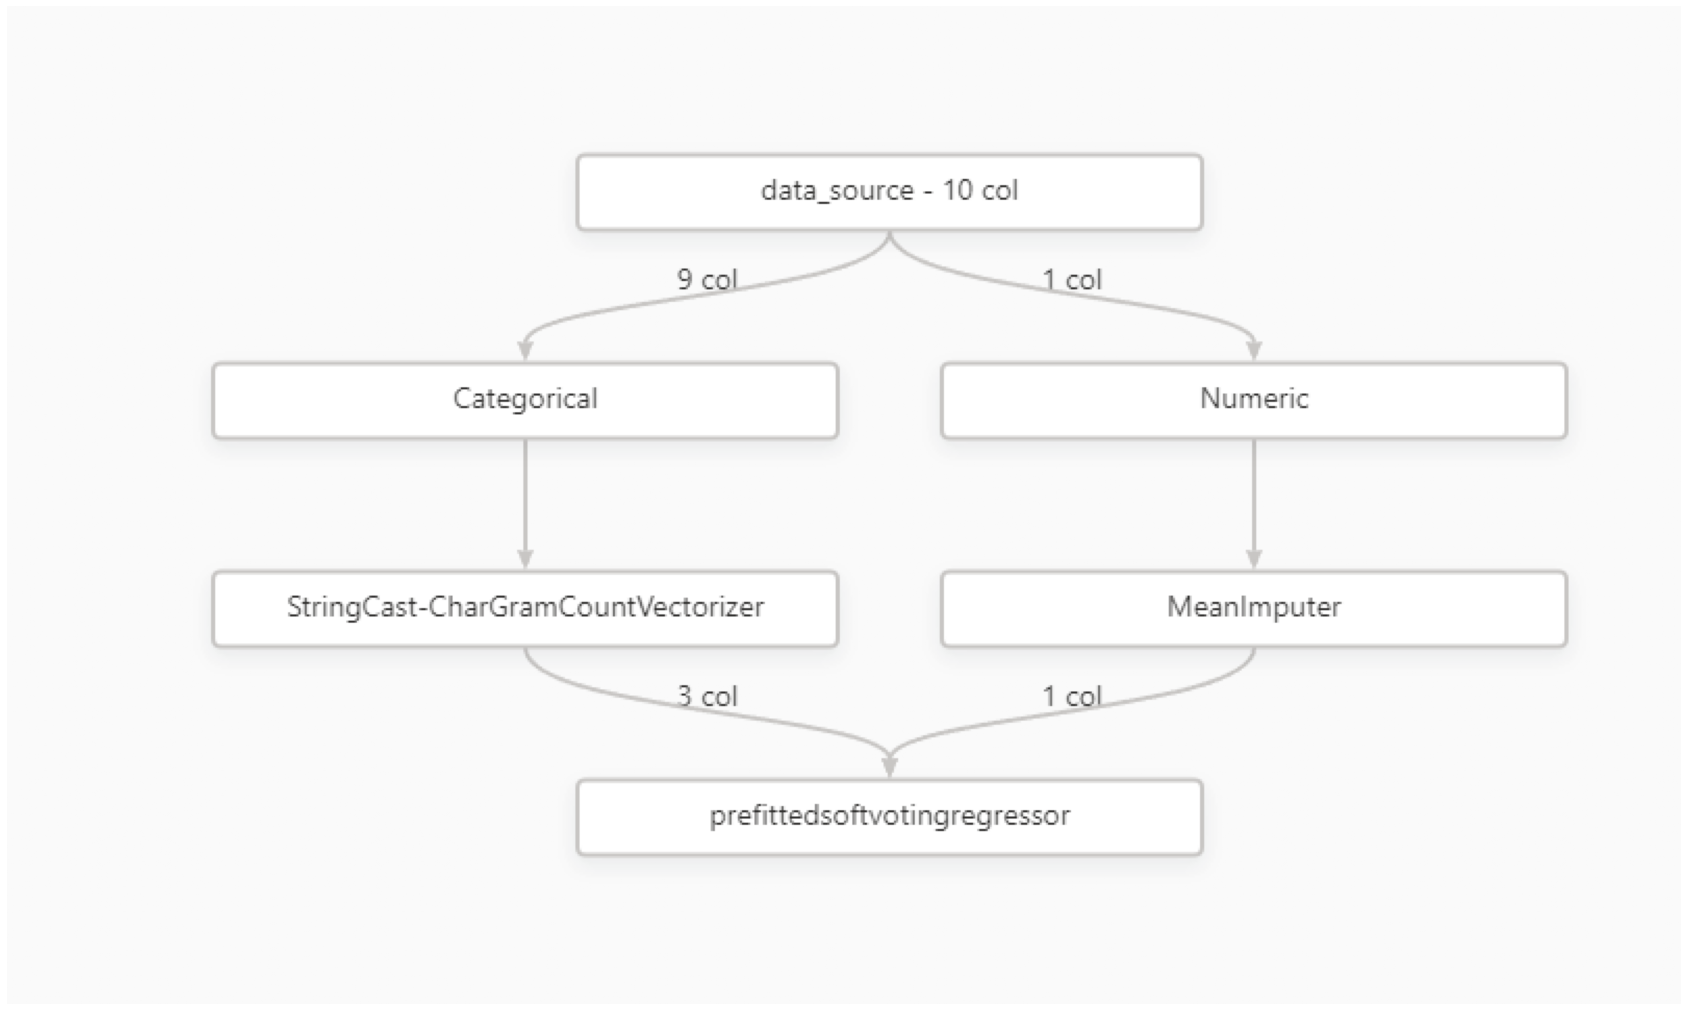

In [32]:
# Show images
img = mpimg.imread('1.png')
plt.figure(figsize=(30, 24))
plt.imshow(img)
plt.axis('off') 
plt.show()
img = mpimg.imread('2.png')
plt.figure(figsize=(30, 24))
plt.imshow(img)
plt.axis('off')
plt.show()
img = mpimg.imread('3.png')
plt.figure(figsize=(30, 24))
plt.imshow(img)
plt.axis('off') 
plt.show()
